In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style

# print([model[15:] for model in os.listdir("Elasticc")][:-1])
fit_file = "07"
head = fits.open(f"Elasticc/ELASTICC_TRAIN_uLens-Single_PyLIMA/ELASTICC_TRAIN_NONIaMODEL0-00{fit_file}_HEAD.FITS.gz")[1].data
phot = fits.open(f"Elasticc/ELASTICC_TRAIN_uLens-Single_PyLIMA/ELASTICC_TRAIN_NONIaMODEL0-00{fit_file}_PHOT.FITS.gz")[1].data
Table(head[:5])
# Table(phot[:5])


SNID,IAUC,FAKE,RA,DEC,PIXSIZE,NXPIX,NYPIX,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,VPEC,VPEC_ERR,HOSTGAL_NMATCH,HOSTGAL_NMATCH2,HOSTGAL_OBJID,HOSTGAL_FLAG,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_SPECZ,HOSTGAL_SPECZ_ERR,HOSTGAL_RA,HOSTGAL_DEC,HOSTGAL_SNSEP,HOSTGAL_DDLR,HOSTGAL_CONFUSION,HOSTGAL_LOGMASS,HOSTGAL_LOGMASS_ERR,HOSTGAL_LOGSFR,HOSTGAL_LOGSFR_ERR,HOSTGAL_LOGsSFR,HOSTGAL_LOGsSFR_ERR,HOSTGAL_COLOR,HOSTGAL_COLOR_ERR,HOSTGAL_ELLIPTICITY,HOSTGAL_OBJID2,HOSTGAL_SQRADIUS,HOSTGAL_OBJID_UNIQUE,HOSTGAL_MAG_u,HOSTGAL_MAG_g,HOSTGAL_MAG_r,HOSTGAL_MAG_i,HOSTGAL_MAG_z,HOSTGAL_MAG_Y,HOSTGAL_MAGERR_u,HOSTGAL_MAGERR_g,HOSTGAL_MAGERR_r,HOSTGAL_MAGERR_i,HOSTGAL_MAGERR_z,HOSTGAL_MAGERR_Y,HOSTGAL2_OBJID,HOSTGAL2_FLAG,HOSTGAL2_PHOTOZ,HOSTGAL2_PHOTOZ_ERR,HOSTGAL2_SPECZ,HOSTGAL2_SPECZ_ERR,HOSTGAL2_RA,HOSTGAL2_DEC,HOSTGAL2_SNSEP,HOSTGAL2_DDLR,HOSTGAL2_LOGMASS,HOSTGAL2_LOGMASS_ERR,HOSTGAL2_LOGSFR,HOSTGAL2_LOGSFR_ERR,HOSTGAL2_LOGsSFR,HOSTGAL2_LOGsSFR_ERR,HOSTGAL2_COLOR,HOSTGAL2_COLOR_ERR,HOSTGAL2_ELLIPTICITY,HOSTGAL2_OBJID2,HOSTGAL2_SQRADIUS,HOSTGAL2_OBJID_UNIQUE,HOSTGAL2_MAG_u,HOSTGAL2_MAG_g,HOSTGAL2_MAG_r,HOSTGAL2_MAG_i,HOSTGAL2_MAG_z,HOSTGAL2_MAG_Y,HOSTGAL2_MAGERR_u,HOSTGAL2_MAGERR_g,HOSTGAL2_MAGERR_r,HOSTGAL2_MAGERR_i,HOSTGAL2_MAGERR_z,HOSTGAL2_MAGERR_Y,HOSTGAL_SB_FLUXCAL_u,HOSTGAL_SB_FLUXCAL_g,HOSTGAL_SB_FLUXCAL_r,HOSTGAL_SB_FLUXCAL_i,HOSTGAL_SB_FLUXCAL_z,HOSTGAL_SB_FLUXCAL_Y,PEAKMJD,MJD_TRIGGER,MJD_DETECT_FIRST,MJD_DETECT_LAST,SEARCH_TYPE,SIM_MODEL_NAME,SIM_MODEL_INDEX,SIM_TYPE_INDEX,SIM_TYPE_NAME,SIM_TEMPLATE_INDEX,SIM_LIBID,SIM_NGEN_LIBID,SIM_NOBS_UNDEFINED,SIM_SEARCHEFF_MASK,SIM_REDSHIFT_HELIO,SIM_REDSHIFT_CMB,SIM_REDSHIFT_HOST,SIM_REDSHIFT_FLAG,SIM_VPEC,SIM_HOSTLIB_GALID,SIM_DLMU,SIM_LENSDMU,SIM_RA,SIM_DEC,SIM_MWEBV,SIM_PEAKMJD,SIM_MAGSMEAR_COH,SIM_AV,SIM_RV,SIM_PEAKMAG_u,SIM_PEAKMAG_g,SIM_PEAKMAG_r,SIM_PEAKMAG_i,SIM_PEAKMAG_z,SIM_PEAKMAG_Y,SIM_TEMPLATEMAG_u,SIM_TEMPLATEMAG_g,SIM_TEMPLATEMAG_r,SIM_TEMPLATEMAG_i,SIM_TEMPLATEMAG_z,SIM_TEMPLATEMAG_Y,SIM_EXPOSURE_u,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_EXPOSURE_Y,SIM_SUBSAMPLE_INDEX
str16,str16,int16,float64,float64,float32,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,str32,int16,int16,str8,int32,int32,int32,int32,int32,float32,float32,float32,int16,float32,int64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16
56104259,NULL,2,158.58328962315042,-59.27197975996876,0.2,-9,-9,187,192,1,192,1.4334797,0.07167398,-9.0,-9.0,-9.0,-9.0,0.0,0.0,0,0,-9,0,-9.0,-9.0,-9.0,-9.0,-999.0,-999.0,-9.0,-9.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,0,0,-9.0,-9.0,-9.0,-9.0,-999.0,-999.0,-9.0,-9.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,60378.17,60361.223,60361.223,60389.105,-9,LCLIB,12,87,uLens_Ga,3700,7570,1,0,5,0.0,0.0,0.0,2,0.0,-9,0.0,0.0,158.58328247070312,-59.27198028564453,1.4198054,6

https://github.com/ebachelet/pyLIMA/issues/52

### Balance of the Elasticc data set (.fit)

In [25]:
%%time
# models = {model: aumount_of_light_curves}
data_set = "Elasticc"
lc_models = [folder for folder in os.listdir("Elasticc") if "ELASTICC_TRAIN" in folder]
models = {}
for model in lc_models:
    heads = [f for f in os.listdir(f"Elasticc/{model}") if f[-12:] == "HEAD.FITS.gz"]
    for fit in heads:
        h = fits.open(f"Elasticc/{model}/{fit}")[1].data
    models[model[15:]] = len(h)

CPU times: user 2min 7s, sys: 1.39 s, total: 2min 8s
Wall time: 2min 30s


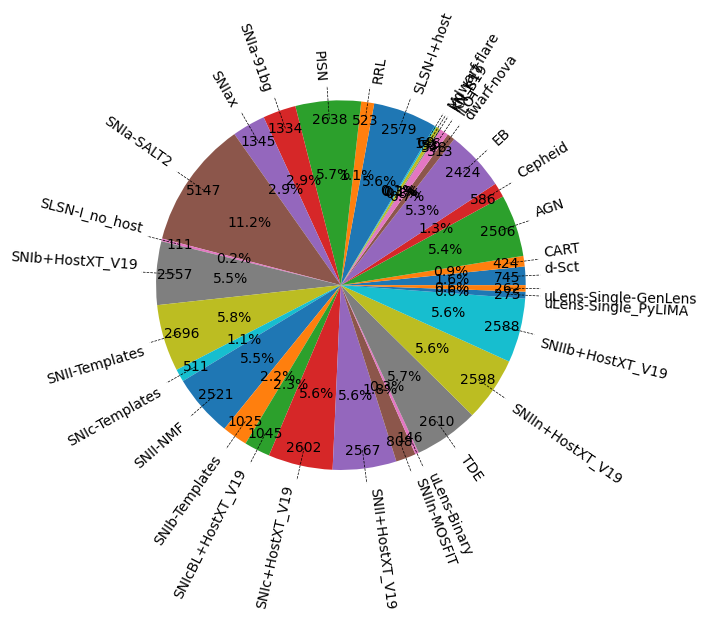

In [107]:
# Pie chart
labels=list(models.keys())
values = list(models.values())
plt.figure(figsize=(6, 6)) 
wedges, label, j = plt.pie(models.values(), labels=models.keys(), autopct='%1.1f%%', rotatelabels=True)
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    theta = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = 0.9 * np.cos(theta * np.pi / 180)
    y = 0.9 * np.sin(theta * np.pi / 180)
    plt.text(x, y, f'{values[i]}', ha='center', va='center')
    plt.plot([x, 1.2 * x], [y, 1.2 * y], color='black', linestyle='--', linewidth=0.5)

### Balance of a MicroLIA data set (.dat)

In [27]:
%%time
dataset_path = "Anibal_r"  #"2305222212g" # "Anibal_r" 
def dataset_size_MicroLIA(dataset_path):
    data_path_test = [dataset_path+"/"+folder for folder in os.listdir(dataset_path) if "test" in folder][0] #f"{data_set}/test_set-{data_set[:-1]}"
    data_path_train = [dataset_path+"/"+folder for folder in os.listdir(dataset_path) if "train" in folder][0] #ff"{data_set}/training_set-{data_set[:-1]}"
    lc_models = os.listdir(data_path_test)
    models = {}
    models_train = {}
    models_test = {}
    for model in os.listdir(data_path_test):
        test = [f for f in os.listdir(f"{data_path_test}/{model}") if f[-4:] == ".dat"]
        train = [f for f in os.listdir(f"{data_path_train}/{model}") if f[-4:] == ".dat"]
        models[model[15:]] = len(test)+len(train)
        models_train[model[15:]] = len(train)
        models_test[model[15:]] = len(test)
    return models, models_train, models_test

models_size = dataset_size_MicroLIA(dataset_path)

CPU times: user 3.68 ms, sys: 8.25 ms, total: 11.9 ms
Wall time: 22.5 ms


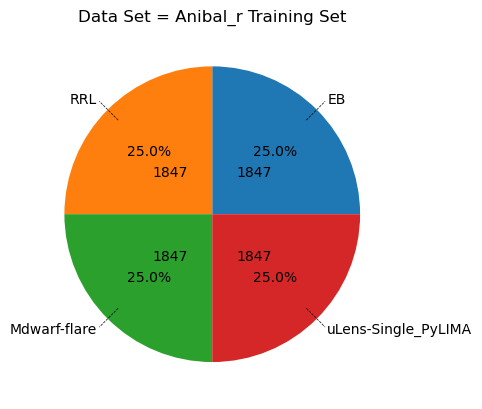

In [28]:
models = models_size[1]
labels=list(models.keys())
values = list(models.values())
# plt.figure(figsize=(6, 6)) 
plt.title(f"Data Set = {dataset_path} Training Set")  # 0: Total , 1: Training, 2: Test
wedges, label, j = plt.pie(models.values(), labels=models.keys(), radius = 1, autopct='%1.1f%%', rotatelabels=False)
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    theta = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = np.cos(theta * np.pi / 180)
    y = np.sin(theta * np.pi / 180)
    plt.text(0.4*x, 0.4*y, f'{values[i]}', ha='center', va='center')
    plt.plot([0.9*x, 1.2*0.9 * x], [0.9*y, 1.2 *0.9* y], color='black', linestyle='--', linewidth=0.5)

### Sky view of light curves location: one fit of a model
Elasticc / *Models* (32 folders)/ *.fit* (40 files) → n curves 

Text(0, 0.5, 'Declination [degrees]')

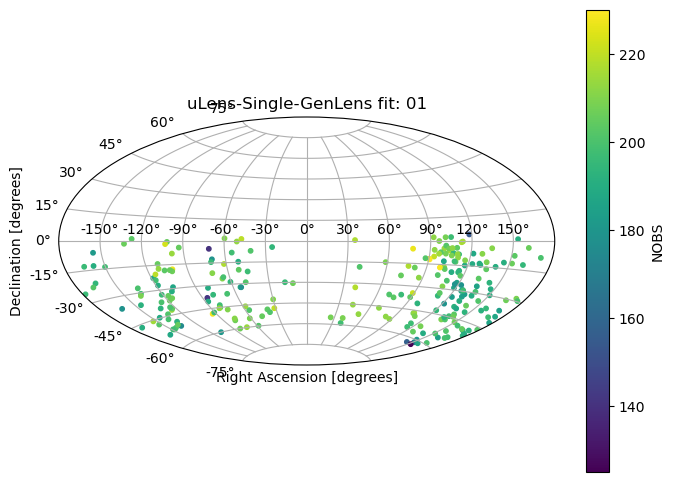

In [47]:
data_set = "Elasticc"                         # data set folder
model = "ELASTICC_TRAIN_uLens-Single-GenLens" # model folder
fit_file = "01"                               # fit file
lc = 8                                        # light curve

head = fits.open(f"Elasticc/{model}/ELASTICC_TRAIN_NONIaMODEL0-00{fit_file}_HEAD.FITS.gz")[1].data

# plt.style.use(astropy_mpl_style)  # default Astropy style
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='aitoff')  # Aitoff projection example
ax.grid(True) 

ra = head["RA"]  # Right Ascension in degrees
dec = head["DEC"]  # Declination in degrees
sky_coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')

nobs = head["NOBS"]
sc = ax.scatter(sky_coords.ra.wrap_at(180 * u.deg).radian, sky_coords.dec.radian, c=nobs, cmap='viridis', s=10)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('NOBS')

ax.set_title(model[15:] + f" fit: {fit_file}")
ax.set_xlabel('Right Ascension [degrees]')
ax.set_ylabel('Declination [degrees]')

In [ ]:
col = "SNID"
file[col] = file[col].astype('category')
vals = file[col].value_counts()
a = vals.hist()
plt.title(col)
len(vals[225<vals])

### Sky view of light curves location: all curves of a model
Elasticc / *Models* (32 folders)/ *.fit* (40 files) → n curves 

['d-Sct', 'CART', 'AGN', 'Cepheid', 'EB', 'dwarf-nova', 'ILOT', 'KN_B19', 'KN_K17', 'Mdwarf-flare', 'SLSN-I+host', 'RRL', 'PISN', 'SNIa-91bg', 'SNIax', 'SNIa-SALT2', 'SLSN-I_no_host', 'SNIb+HostXT_V19', 'SNII-Templates', 'SNIc-Templates', 'SNII-NMF', 'SNIb-Templates', 'SNIcBL+HostXT_V19', 'SNIc+HostXT_V19', 'SNII+HostXT_V19', 'SNIIn-MOSFIT', 'uLens-Binary', 'TDE', 'SNIIn+HostXT_V19', 'SNIIb+HostXT_V19', 'uLens-Single_PyLIMA', 'uLens-Single-GenLens', 'nts']

In [51]:
data_set = "Elasticc"
models = os.listdir("Elasticc")[:-1]
colors = dict(zip(models, ["b", "r", "g", "y"]))
def sky_elasticc(model):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='aitoff')
    ax.grid(True)
    cax = None 

    for fit in [file for file in sorted(os.listdir(Path(data_set, model))) if file[-12:] == "HEAD.FITS.gz"]:
        head = fits.open(Path(data_set, model, fit))[1].data
        ra = head["RA"]
        dec = head["DEC"]
        nobs = head["NOBS"]
        sky_coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')
        sc = ax.scatter(sky_coords.ra.wrap_at(180 * u.deg).radian, sky_coords.dec.radian, marker=".", c=nobs, cmap='GnBu', s=10, alpha=0.3)
        
        if cax is None:
            cax = plt.colorbar(sc, ax=ax)
            cax.set_label('NOBS')
        
    ax.set_xlabel('Right Ascension (hours)')
    ax.set_ylabel('Declination (degrees)')
    plt.annotate(model[15:], xy=(0.3, 1.1), xytext=(20, 0), xycoords='axes fraction', textcoords='offset points', fontsize=10)
    plt.savefig(f"Figures_sky/sky_{model[15:]}.png")
    plt.close()



for i, model in enumerate(models):
    print(model, " ", i+1, "/", len(models))
    sky_elasticc(model)

ELASTICC_TRAIN_d-Sct   1 / 32
ELASTICC_TRAIN_CART   2 / 32
ELASTICC_TRAIN_AGN   3 / 32
ELASTICC_TRAIN_Cepheid   4 / 32
ELASTICC_TRAIN_EB   5 / 32
ELASTICC_TRAIN_dwarf-nova   6 / 32
ELASTICC_TRAIN_ILOT   7 / 32
ELASTICC_TRAIN_KN_B19   8 / 32
ELASTICC_TRAIN_KN_K17   9 / 32
ELASTICC_TRAIN_Mdwarf-flare   10 / 32
ELASTICC_TRAIN_SLSN-I+host   11 / 32
ELASTICC_TRAIN_RRL   12 / 32
ELASTICC_TRAIN_PISN   13 / 32
ELASTICC_TRAIN_SNIa-91bg   14 / 32
ELASTICC_TRAIN_SNIax   15 / 32
ELASTICC_TRAIN_SNIa-SALT2   16 / 32
ELASTICC_TRAIN_SLSN-I_no_host   17 / 32
ELASTICC_TRAIN_SNIb+HostXT_V19   18 / 32
ELASTICC_TRAIN_SNII-Templates   19 / 32
ELASTICC_TRAIN_SNIc-Templates   20 / 32
ELASTICC_TRAIN_SNII-NMF   21 / 32
ELASTICC_TRAIN_SNIb-Templates   22 / 32
ELASTICC_TRAIN_SNIcBL+HostXT_V19   23 / 32
ELASTICC_TRAIN_SNIc+HostXT_V19   24 / 32
ELASTICC_TRAIN_SNII+HostXT_V19   25 / 32
ELASTICC_TRAIN_SNIIn-MOSFIT   26 / 32
ELASTICC_TRAIN_uLens-Binary   27 / 32
ELASTICC_TRAIN_TDE   28 / 32
ELASTICC_TRAIN_SNIIn+HostXT

## Light curves plotting:
Elasticc / *Models* (32 folders)/ *.fit* (40 files) → n curves 

In [6]:
def lc_elasticc(model, fit_file, lc, Bands = "all", save = True):
    fig = plt.figure(model+fit_file)
    data_set = "Elasticc"  
    ff =[file for file in os.listdir(Path(data_set, model)) if file[-7:]=="FITS.gz"][0]
    ff = ff.split("-")[0]
    head = fits.open(Path(data_set, model, ff+f"-00{fit_file}_HEAD.FITS.gz"))[1].data
    phot = fits.open(Path(data_set, model, ff+f"-00{fit_file}_PHOT.FITS.gz"))[1].data
    inicio = head["PTROBS_MIN"][lc]
    final = head["PTROBS_MAX"][lc]
    curva = phot[inicio:final]
    if Bands == "all":
        Bands = ["u ", "g ", "r ", "z ", "i ", "Y "]
    filtercolors = {'u ':'b', 'g ':'c', 'r ':'g', 'i ':'orange', 'z ':'r', 'Y ':'m'}
    for band in Bands:
        lc_band = curva[curva["BAND"] == band]
        mjd = (lc_band["MJD"]-51544.5)/365.25 # Años
    #     mag = magnitud(curva["FLUXCAL"])
    #     mag_err =  magnitud_err(curva["FLUXCAL"],curva["FLUXCALERR"])
        flux = lc_band["FLUXCAL"]
        flux_err = lc_band["FLUXCALERR"]
        plt.errorbar(mjd, flux, flux_err, color=filtercolors[band], marker='o', mew = 0.05,linestyle='--', lw = 1, label = band[0])
    plt.xlabel("Epoch (year)")
    plt.ylabel("Flux")
    plt.title(model+" "+fit_file+" "+str(lc))
    plt.legend()
    if save:
        plt.savefig(f"Figures_lc/lc_{model}-{fit_file}-{lc}.png")
    plt.close()
    return curva, mjd, flux, flux_err, fig

models = [model for model in os.listdir("Elasticc") if model.startswith("ELASTICC")]# model folder
fit_file = "30"                               # fit file
lc = 16                                        # light curve
# Bands = ["u ", "g ", "r ", "z ", "i ", "Y "]
for model in models:
    curva, mjd, flux, flux_err, fig = lc_elasticc(model, fit_file, lc)
    print(model)

ELASTICC_TRAIN_d-Sct
ELASTICC_TRAIN_CART
ELASTICC_TRAIN_AGN
ELASTICC_TRAIN_Cepheid
ELASTICC_TRAIN_EB
ELASTICC_TRAIN_dwarf-nova
ELASTICC_TRAIN_ILOT
ELASTICC_TRAIN_KN_B19
ELASTICC_TRAIN_KN_K17
ELASTICC_TRAIN_Mdwarf-flare
ELASTICC_TRAIN_SLSN-I+host
ELASTICC_TRAIN_RRL
ELASTICC_TRAIN_PISN
ELASTICC_TRAIN_SNIa-91bg
ELASTICC_TRAIN_SNIax
ELASTICC_TRAIN_SNIa-SALT2
ELASTICC_TRAIN_SLSN-I_no_host
ELASTICC_TRAIN_SNIb+HostXT_V19
ELASTICC_TRAIN_SNII-Templates
ELASTICC_TRAIN_SNIc-Templates
ELASTICC_TRAIN_SNII-NMF
ELASTICC_TRAIN_SNIb-Templates
ELASTICC_TRAIN_SNIcBL+HostXT_V19
ELASTICC_TRAIN_SNIc+HostXT_V19
ELASTICC_TRAIN_SNII+HostXT_V19
ELASTICC_TRAIN_SNIIn-MOSFIT
ELASTICC_TRAIN_uLens-Binary
ELASTICC_TRAIN_TDE
ELASTICC_TRAIN_SNIIn+HostXT_V19
ELASTICC_TRAIN_SNIIb+HostXT_V19
ELASTICC_TRAIN_uLens-Single_PyLIMA
ELASTICC_TRAIN_uLens-Single-GenLens


### Plotting the theorical light curves and simulated one

In [ ]:
model = "ELASTICC_TRAIN_uLens-Single_PyLIMA"
fit_file = "05" ; lc = 8 ; Bands = ["u"]
curva, mjd, flux, flux_err, fig = lc_elasticc(model, fit_file, lc, Bands = Bands, save = False)

 data_set = "Elasticc"  
    ff =[file for file in os.listdir(Path(data_set, model)) if file[-7:]=="FITS.gz"][0]
    ff = ff.split("-")[0]
    head = fits.open(Path(data_set, model, ff+f"-00{fit_file}_HEAD.FITS.gz"))[1].data
    phot = fits.open(Path(data_set, model, ff+f"-00{fit_file}_PHOT.FITS.gz"))[1].data
    inicio = head["PTROBS_MIN"][lc]

fig.plot()

### Merged DataFrame

In [2]:
model = "uLens-Single_PyLIMA"
file = pd.read_csv(Path(model, f"{model}.txt"))
file = file.drop(file[file['MJD'] == -777].index)
file = file.drop(["Unnamed: 0", "FIELD", "PTROBS_MIN", "PTROBS_MAX", "IAUC"], axis=1)
file["BAND"]=file["BAND"].str[2]

In [27]:
columns = file.columns[1:]
constants = []
for i, col in enumerate(columns):
    if (file[col].dtype != "O") and (len(file[col].unique())>20) and (file[col].dtype != "Categorical"): # Numerical and non discrete columns
        if file[col].std() < 0.001:                                    # Write the constant columns on constants.txt 
            constants.append((col, file[col].mean()))
        else:                                                          # Scatter plot of each non constant column
            file.plot("MJD", col, kind="scatter", s=0.5, alpha=0.3, figsize = (15,5))
            plt.title(col)
            plt.savefig(Path(model, f"{col}.png"))
            plt.close()
    else:
        if len(file[col].unique()) == 1:                               # Write the constant columns on constants.txt
            constants.append((col, file[col].unique()[0]))
        else:
            file[col] = file[col].astype('category')                   # If numerical but unique<20
#             file[col].hist()
            vals = file[col].value_counts()                            # Histogram of each categorical column
            vals.plot.bar()
            # plt.title(col)
            plt.savefig(Path(model, f"{col}.png"))
            plt.close()
# print(constants)
with open(Path(model, 'constants.txt'), 'w') as const:
    for item in constants:
        const.write("{:<25}\t{:>6} \n".format(str(item[0]), str(item[1])))

SNID
b'22513728        '    239
b'23714361        '    239
b'70641519        '    239
b'45844504        '    236
b'53585607        '    236
                      ... 
b'41665152        '    116
b'71317710        '    116
b'23573847        '    116
b'31282054        '    116
b'67524832        '    115
Name: count, Length: 2893, dtype: int64


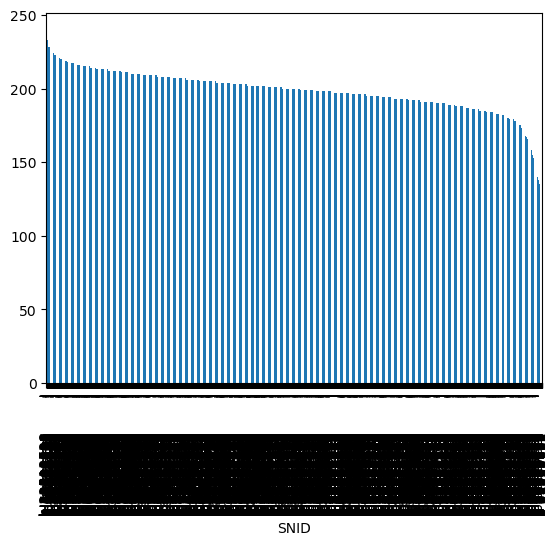

In [39]:
col = "SNID"
file[col] = file[col].astype('category')
vals = file[col]
vals.plot.bar()
# plt.title(col)
print(vals)

[Text(0, 0, 'u'),
 Text(1, 0, 'g'),
 Text(2, 0, 'r'),
 Text(3, 0, 'i'),
 Text(4, 0, 'z'),
 Text(5, 0, 'Y')]

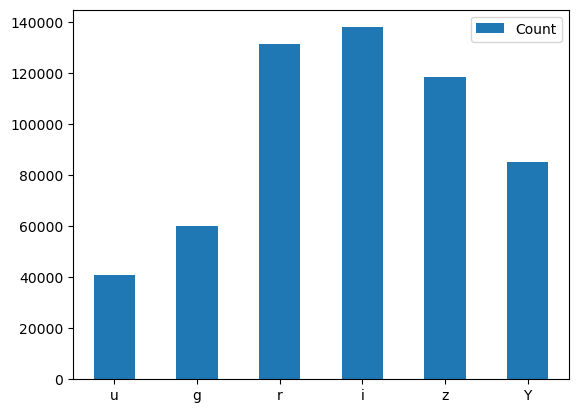

In [82]:
data = {'Filter': ['u', 'g', 'r', 'i', 'z', 'Y'],
        'Count': [41010, 60042, 131450, 137878, 118387, 85246]}
df = pd.DataFrame(data)
ax =df.plot(kind="bar")
ax.set_xticklabels(["u","g","r","i","z","Y"], rotation=0)

In [6]:
runs = [("xgb", "2305222212Y")]
dataset_paths = ["2305222212"+ i for i in "ugrizY"]
models_names = ["rf", "nn"]
for model in models_names:
    for run in dataset_paths:
        runs.append((model, run))
models_names.append("xgb")
for model in models_names:
    runs.append((model, "Anibal_dataset"))

In [7]:
runs

[('xgb', '2305222212Y'),
 ('rf', '2305222212u'),
 ('rf', '2305222212g'),
 ('rf', '2305222212r'),
 ('rf', '2305222212i'),
 ('rf', '2305222212z'),
 ('rf', '2305222212Y'),
 ('nn', '2305222212u'),
 ('nn', '2305222212g'),
 ('nn', '2305222212r'),
 ('nn', '2305222212i'),
 ('nn', '2305222212z'),
 ('nn', '2305222212Y'),
 ('rf', 'Anibal_dataset'),
 ('nn', 'Anibal_dataset'),
 ('xgb', 'Anibal_dataset')]